In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ssl
import fsspec
import xarray as xr
from pyesgf.logon import LogonManager

# logon
manager = LogonManager()
if not manager.is_logged_on():
    myproxy_host = 'esgf-data.dkrz.de'
    manager.logon(hostname=myproxy_host, interactive=True, bootstrap=True)

# create SSL context
sslcontext = ssl.create_default_context(purpose=ssl.Purpose.SERVER_AUTH)
sslcontext.load_verify_locations(capath=manager.esgf_certs_dir)
sslcontext.load_cert_chain(manager.esgf_credentials)

# example of opening file
#download_url = 'http://cordexesg.dmi.dk/thredds/fileServer/cordex_general/cordex/output/EUR-11/DMI/ECMWF-ERAINT/evaluation/r1i1p1/DMI-HIRHAM5/v1/mon/tas/v20140620/tas_EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_DMI-HIRHAM5_v1_mon_198901-199012.nc'
#with fsspec.open(download_url, ssl=sslcontext) as file:
#    ds = xr.open_dataset(file)
#    print(ds)

<xarray.Dataset>
Dimensions:       (rlat: 412, rlon: 424, time: 24, bounds: 2)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * time          (time) datetime64[ns] 1989-01-16T12:00:00 ... 1990-12-16T12...
Dimensions without coordinates: bounds
Data variables:
    rotated_pole  |S1 ...
    tas           (time, rlat, rlon) float32 ...
    time_bnds     (time, bounds) datetime64[ns] ...
    height        float64 ...
Attributes: (12/23)
    CDI:                            Climate Data Interface version 1.5.3 (htt...
    history:                        Thu Nov 14 20:02:22 2013: /usr/local/bin/...
    institution:                    Danish Meteorological Institute
    Conventions:                    CF-1.6
    tracking_id:                    108d904e-e9e9-464b-85a7-dba596f6b5bc
    contact

In [3]:
from recipe import main
recipe = await main(ssl=sslcontext)

Requesting data for Node: https://esgf-node.llnl.gov/esg-search/search and CORDEX.output.AFR-44.DMI.ECMWF-ERAINT.evaluation.r1i1p1.HIRHAM5.v2.mon.tas...
Requesting data for Node: https://esgf-node.llnl.gov/esg-search/search and CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r1i1p1.REMO2009.v1.mon.tas...
Requesting data for Node: https://esgf-node.llnl.gov/esg-search/search and CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r0i0p0.REMO2009.v1.fx.orog...
http://esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-11/MPI-CSC/MPI-M-MPI-ESM-LR/historical/r0i0p0/MPI-CSC-REMO2009/v1/fx/orog/v20160419/orog_EUR-11_MPI-M-MPI-ESM-LR_historical_r0i0p0_MPI-CSC-REMO2009_v1_fx.nc
CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r0i0p0.REMO2009.v1.fx.orog: Check for netcdf 3 files
Request for Node:https://esgf-node.llnl.gov/esg-search/search and CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r0i0p0.REMO2009.v1.fx.orog failed due to list index out of range
Req

In [4]:
recipe.keys()

dict_keys(['CORDEX.output.AFR-44.DMI.ECMWF-ERAINT.evaluation.r1i1p1.HIRHAM5.v2.mon.tas', 'CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r1i1p1.REMO2009.v1.mon.tas'])

In [5]:
from pangeo_forge_recipes.recipes import setup_logging
setup_logging()

In [6]:
# Prune the recipe
recipe_pruned = recipe['CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r1i1p1.REMO2009.v1.mon.tas'].copy_pruned()

In [7]:
# Run the recipe
run_function = recipe_pruned.to_function()
%time run_function()

pangeo_forge_recipes.recipes.xarray_zarr - INFO - Caching input 'Index({DimIndex(name='time', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)})'
pangeo_forge_recipes.storage - INFO - Caching file 'http://esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-11/MPI-CSC/MPI-M-MPI-ESM-LR/historical/r1i1p1/MPI-CSC-REMO2009/v1/mon/tas/v20160419/tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_195002-195012.nc'
pangeo_forge_recipes.storage - WARNING - POSIX filesystems don't allow filenames to exceed 255 bytes in length. Truncating the filename slug for path 'http://esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-11/MPI-CSC/MPI-M-MPI-ESM-LR/historical/r1i1p1/MPI-CSC-REMO2009/v1/mon/tas/v20160419/tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_195002-195012.nc' to 'dkrz.de_thredds_fileserver_cordex_cordex_output_eur-11_mpi-csc_mpi-m-mpi-esm-lr_historical_r1i1p1_mpi-csc-remo2009_v1_mon_tas_v20160419_tas_eur-11_mpi-m-mpi-esm-lr_

/opt/anaconda3/envs/pyesgf/lib/python3.10/site-packages/pangeo_forge_recipes/recipes/xarray_zarr.py:115: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  return xr.open_zarr(target.get_mapper())


pangeo_forge_recipes.recipes.xarray_zarr - INFO - Combining inputs for chunk 'Index({DimIndex(name='time', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)})'
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Storing dataset in /var/folders/_8/qq584wg50hvdrcxg3k0wd9900000gn/T/tmp1a6qrwxp/EGWjDFsB
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Expanding target concat dim 'time' to size 131
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Opening inputs for chunk Index({DimIndex(name='time', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)})
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Opening input with Xarray Index({DimIndex(name='time', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)}): 'http://esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-11/MPI-CSC/MPI-M-MPI-ESM-LR/historical/r1i1p1/MPI-CSC-REMO2009/v1/mon/tas/v20160419/tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_195002-195012.nc'
pangeo_forge_recipes.storage

In [11]:
recipe['CORDEX.output.EUR-11.MPI-CSC.MPI-M-MPI-ESM-LR.historical.r1i1p1.REMO2009.v1.mon.tas']

XarrayZarrRecipe(file_pattern=<FilePattern {'time': 7}>, storage_config=StorageConfig(target=FSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x13d95f760>, root_path='/var/folders/_8/qq584wg50hvdrcxg3k0wd9900000gn/T/tmp1a6qrwxp/EGWjDFsB'), cache=CacheFSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x13d95f760>, root_path='/var/folders/_8/qq584wg50hvdrcxg3k0wd9900000gn/T/tmp1a6qrwxp/Uv8gQ3jE'), metadata=MetadataTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x13d95f760>, root_path='/var/folders/_8/qq584wg50hvdrcxg3k0wd9900000gn/T/tmp1a6qrwxp/QDFzenWd')), inputs_per_chunk=1, target_chunks={'time': 1}, cache_inputs=True, copy_input_to_local_file=False, consolidate_zarr=True, consolidate_dimension_coordinates=True, xarray_open_kwargs={}, xarray_concat_kwargs={'join': 'exact'}, delete_input_encoding=True, process_input=None, process_chunk=None, lock_timeout=None, subset_inputs={}, open_input_with_kerchunk=False)

In [13]:
ds = xr.open_zarr(recipe_pruned.target_mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:                     (rlat: 412, rlon: 424, vertices: 4, time: 131,
                                 bnds: 2)
Coordinates:
    height                      float64 ...
    lat                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon                         (rlat, rlon) float32 dask.array<chunksize=(412, 424), meta=np.ndarray>
  * rlat                        (rlat) float64 -23.32 -23.21 ... 21.78 21.89
  * rlon                        (rlon) float64 -28.43 -28.32 ... 17.99 18.1
  * time                        (time) datetime64[ns] 1950-02-15 ... 1960-12-...
Dimensions without coordinates: vertices, bnds
Data variables:
    lat_vertices                (rlat, rlon, vertices) float32 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    lon_vertices                (rlat, rlon, vertices) float32 dask.array<chunksize=(412, 424, 4), meta=np.ndarray>
    rotated_latitude_longitude  int32 ...
    tas                         (time, rlat, rlon) float32 dask.array<chunksize=(1, 412, 424), meta=np.ndarray>
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/29)
    CORDEX_domain:                  EUR-11
    Conventions:                    CF-1.4
    cmor_version:                   2.9.1
    comment:                        CORDEX Europe RCM REMO 0.11 deg EUR-11
    contact:                        gerics-cordex@hzg.de
    creation_date:                  2016-02-01T12:46:19Z
    ...                             ...
    realization:                    1
    references:                     http://www.remo-rcm.de/
    source:                         MPI-CSC-REMO2009
    table_id:                       Table mon (Mar 2015) db0b230ff4a2c922671f...
    title:                          MPI-CSC-REMO2009 model output prepared fo...
    tracking_id:                    a0b3795b-1ed1-438c-9c80-9222458c0bc9

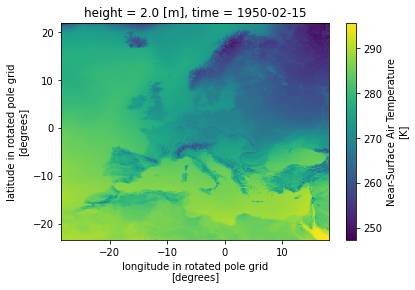

In [15]:
ds.tas.isel(time=0).plot()